In [1]:
import pickle as pkl
import numpy as np
import torch
import blosc

In [2]:
def load(file_name):
    with open(file_name, 'rb') as f:
        loaded = pkl.load(f)
    return loaded

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'grey']
types = ['door', 'key', 'ball', 'box']
actions = ["go", "pick", "up", "open", "put"]
fillers = ["to", "next", "the", "a"]
misc = ["follow_teacher"]
vocab = ['PAD'] + colors + types + actions + fillers + misc

def to_text(tokens):
    words = [vocab[token] for token in tokens if not token == 0]
    return words

def to_vocab_index(mission, pad_length=10):
    words = mission.split(" ")
    
    mission_list = [vocab.index(word) for word in words]
    if pad_length is not None:
        mission_list = mission_list + [0] * (pad_length - len(mission_list))
    if len(mission_list) > pad_length:
        raise ValueError("Mission is too long: " + mission + str(pad_length))
    return mission_list



In [9]:
new_data = load('batch_new_data.pkl')
old_data = load('batch_old_data.pkl')

In [11]:
new_o, new_a, new_m = new_data
old_o, old_a, old_m = old_data

In [63]:
old_a.shape

torch.Size([10, 8])

In [15]:
old_o.obs.shape

torch.Size([10, 380])

<IPython.core.display.Javascript object>


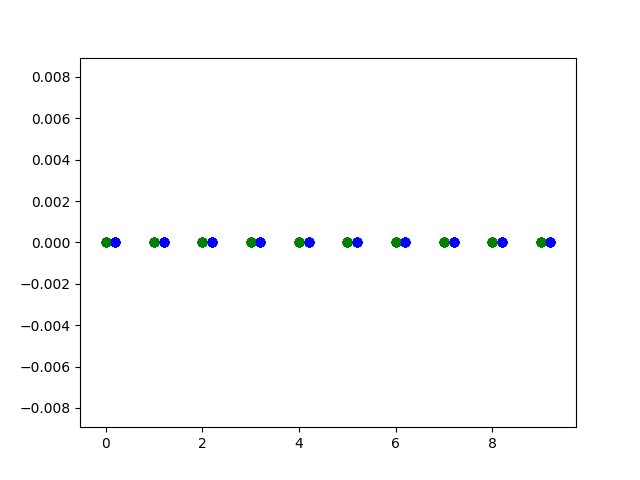

In [60]:
%matplotlib notebook
import matplotlib
# matplotlib.use('Agg')

k = 33
import matplotlib.pyplot as plt
for i in range(10):
    plt.scatter(range(10), new_o.obs[i, k*10:(k+1)*10].detach().cpu().numpy(), color='green')
    plt.scatter(np.array(range(10)) + .2, old_o.obs[i, k*10:(k+1)*10].detach().cpu().numpy(), color='blue')
plt.show()

In [7]:
cd meta-mb-internal

/home/olivia/Documents/Teachable/babyai/meta-mb-internal


# Compare Ours to Theirs

In [ ]:
# loop through
theirs = load('/home/olivia/Teachable/original_babyai/demos/T322_L18_MATCHING_THEIRS.pkl')

for i, their_traj in enumerate(theirs):
    if i % 1000 == 0:
        print(i)
    ours = load(f'/home/olivia/Teachable/babyai/meta-mb-internal/data/'
                'T0330_COLLECT_MATCHING_L18_v3_teacherPreActionAdvice_dense_threshS0.99_threshA0.8_lr0.0001_ent0.01_currfnone_hot_1'
                f'/buffer/traj_train_level18_idx{i}.pkl')
#     print(to_text(ours.obs[0]['instr']))
#     print(ours.teacher_action[:,0])

    # actions
    their_action = np.array([t for t in their_traj[3]])
    assert np.array_equal(ours.teacher_action[:,0], their_action), (ours.teacher_action, their_action)
    
    # obs
#     print("comparing obs")
    our_obs = ours.obs
    their_obs = blosc.unpack_array(their_traj[1])
    for oo, to in zip(our_obs, their_obs):
        assert np.array_equal(oo['obs'], to), (oo['obs'].shape, to.shape)

#     print("first")
    assert np.array_equal(ours.obs[0]['obs'], their_obs[0]), (ours.obs[0]['obs'].shape, their_obs[0].shape)
    
    # instr
    their_mission_tokens = to_vocab_index(their_traj[0])
    our_mission_tokens = ours.obs[0]['instr']
    assert np.array_equal(their_mission_tokens, our_mission_tokens), (their_mission_tokens, our_mission_tokens)
    
print("all good!")

In [ ]:
for t in theirs[:10]:
    print(t[0])

# Compare theirs to theirs

In [ ]:
theirs_1 = load('/home/olivia/Teachable/original_babyai/demos/T322_L18_MATCHING_THEIRS.pkl')
# theirs_2 = load('/home/olivia/Teachable/original_babyai/demos/T322_L18_MATCHING_THEIRS.pkl')

In [ ]:
(len(theirs_1), len(theirs_2))

In [ ]:
i = 0
for traj_1, traj_2 in zip(theirs_1, theirs_2):
    print(np.array(traj_1[3]).astype(np.int32))
    print(traj_2[3])
    if i % 100 == 0:
        print(i)
    assert traj_1[0] == traj_2[0], (traj_1[0], traj_2[0])
    obs_1 = blosc.unpack_array(traj_1[1])
    obs_2 = blosc.unpack_array(traj_2[1])
    assert np.array_equal(obs_1, obs_2)
    assert np.array_equal(traj_1[3], traj_2[3])
    i += 1

In [ ]:
avg = np.mean([len(traj[3]) for traj in theirs_1[:1000]])
print(avg)

In [ ]:
avg = np.mean([traj[3] for traj in theirs_1])
print(avg)

# Compare Ours to Ours

In [ ]:
for i in range(323000):
    print(i)
    ours_1 = load(f'/home/olivia/Teachable/babyai/meta-mb-internal/data/'
                'T0330_GOOD_DATASET_L18'
                f'/buffer/traj_train_level18_idx{i}.pkl')
    ours_2 = load(f'/home/olivia/Teachable/babyai/meta-mb-internal/data/'
                'T0330_COLLECT_MATCHING_L18_v3_teacherPreActionAdvice_dense_threshS0.99_threshA0.8_lr0.0001_ent0.01_currfnone_hot_1'
                f'/buffer/traj_train_level18_idx{i}.pkl')
    
    assert np.array_equal(ours_1.teacher_action, ours_2.teacher_action)